Training set size: 3530
Validation set size: 801
Test set size: 638
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=Fals

/opt/miniconda3/envs/lzl/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Epoch 1/20
--------------------------------------------------
Train Loss: 0.2301
Accuracy:       0.1028
Precision:      0.4371
Recall:         0.1445
F1 Score:       0.2172
Hamming Loss:   0.0776
Subset Accuracy:0.1028
Valid Loss: 0.1721
Accuracy:       0.2222
Precision:      0.6462
Recall:         0.2549
F1 Score:       0.3656
Hamming Loss:   0.0638
Subset Accuracy:0.2222
Best model saved with F1: 0.3656

Epoch 2/20
--------------------------------------------------
Train Loss: 0.1626
Accuracy:       0.2878
Precision:      0.7533
Recall:         0.3182
F1 Score:       0.4474
Hamming Loss:   0.0585
Subset Accuracy:0.2878
Valid Loss: 0.1515
Accuracy:       0.3596
Precision:      0.7025
Recall:         0.3922
F1 Score:       0.5033
Hamming Loss:   0.0558
Subset Accuracy:0.3596
Best model saved with F1: 0.5033

Epoch 3/20
--------------------------------------------------
Train Loss: 0.1390
Accuracy:       0.3629
Precision:      0.7635
Recall:         0.4077
F1 Score:       0.5316
Hammin

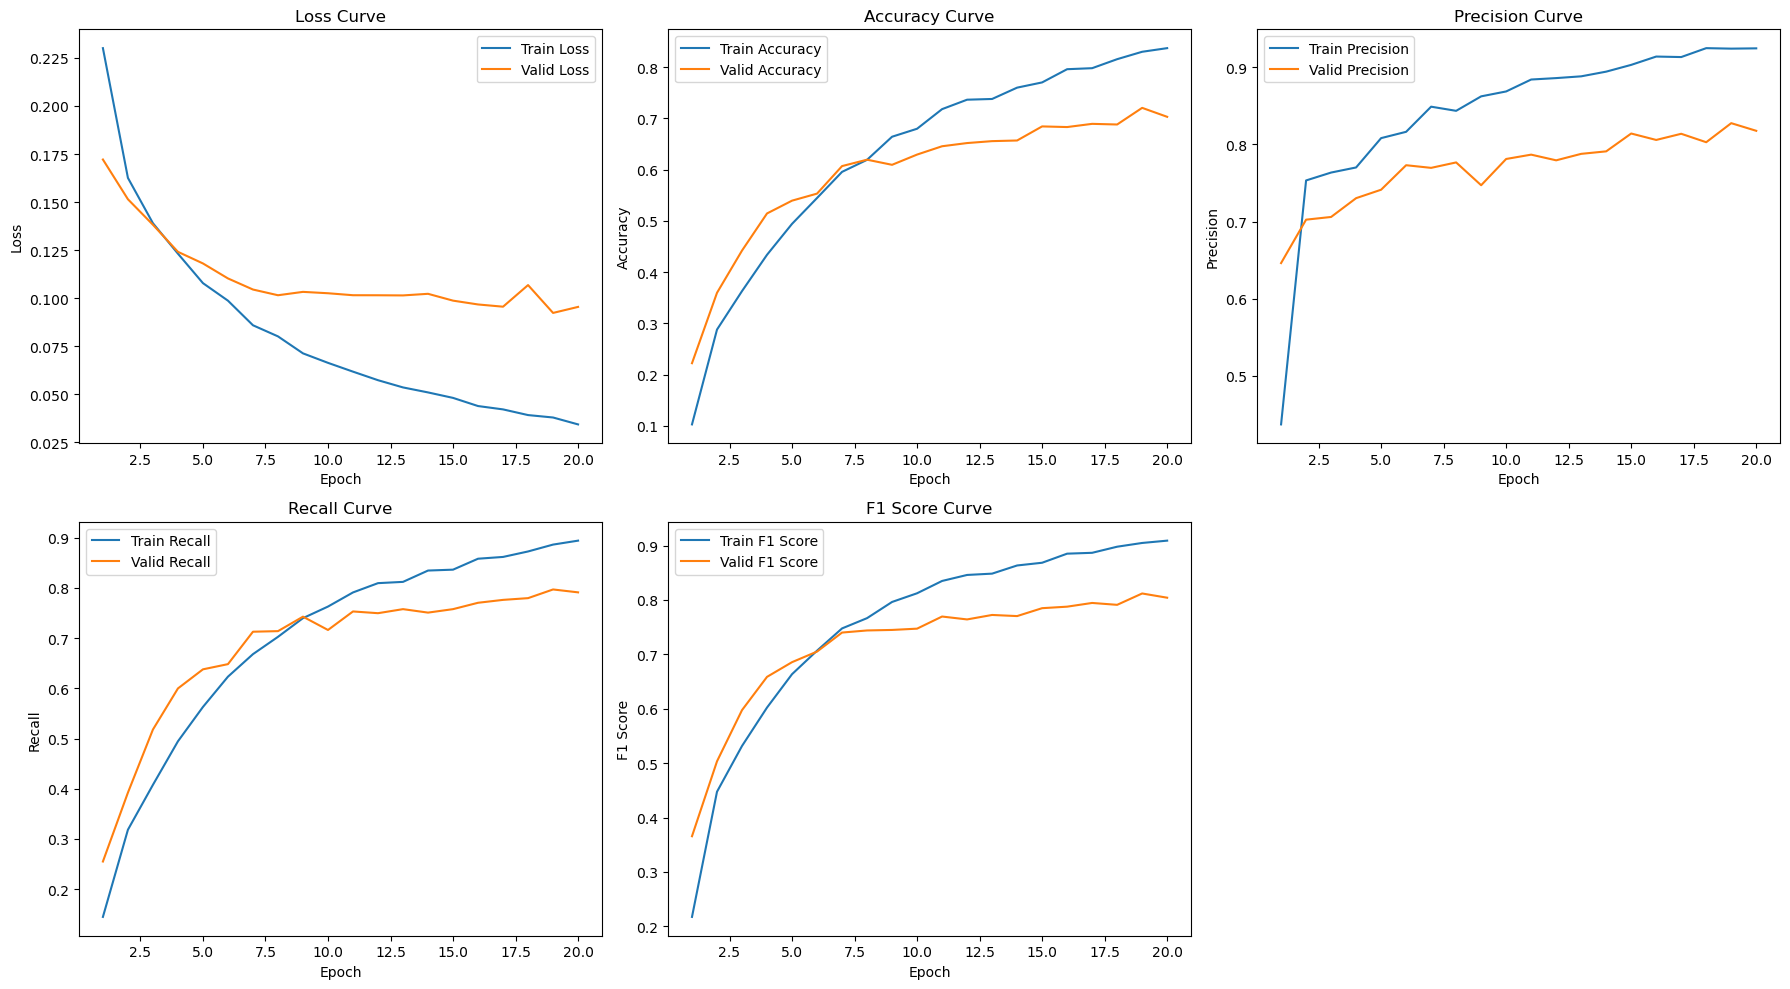

/var/folders/wz/0c7bfp356ll9s67twzcqkv340000gn/T/ipykernel_44288/3029260719.py:439: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('A_best_mo


Performance across different thresholds:

Threshold = 0.3:
Accuracy:       0.6818
Precision:      0.7711
Recall:         0.8229
F1 Score:       0.7961
Hamming Loss:   0.0308
Subset Accuracy:0.6818

Threshold = 0.4:
Accuracy:       0.7038
Precision:      0.8192
Recall:         0.8029
F1 Score:       0.8110
Hamming Loss:   0.0274
Subset Accuracy:0.7038

Threshold = 0.5:
Accuracy:       0.7085
Precision:      0.8478
Recall:         0.7800
F1 Score:       0.8125
Hamming Loss:   0.0263
Subset Accuracy:0.7085

Threshold = 0.6:
Accuracy:       0.7100
Precision:      0.8762
Recall:         0.7586
F1 Score:       0.8132
Hamming Loss:   0.0255
Subset Accuracy:0.7100

Threshold = 0.7:
Accuracy:       0.6959
Precision:      0.9070
Recall:         0.7243
F1 Score:       0.8054
Hamming Loss:   0.0256
Subset Accuracy:0.6959

Best threshold: 0.6 with F1 Score: 0.8132


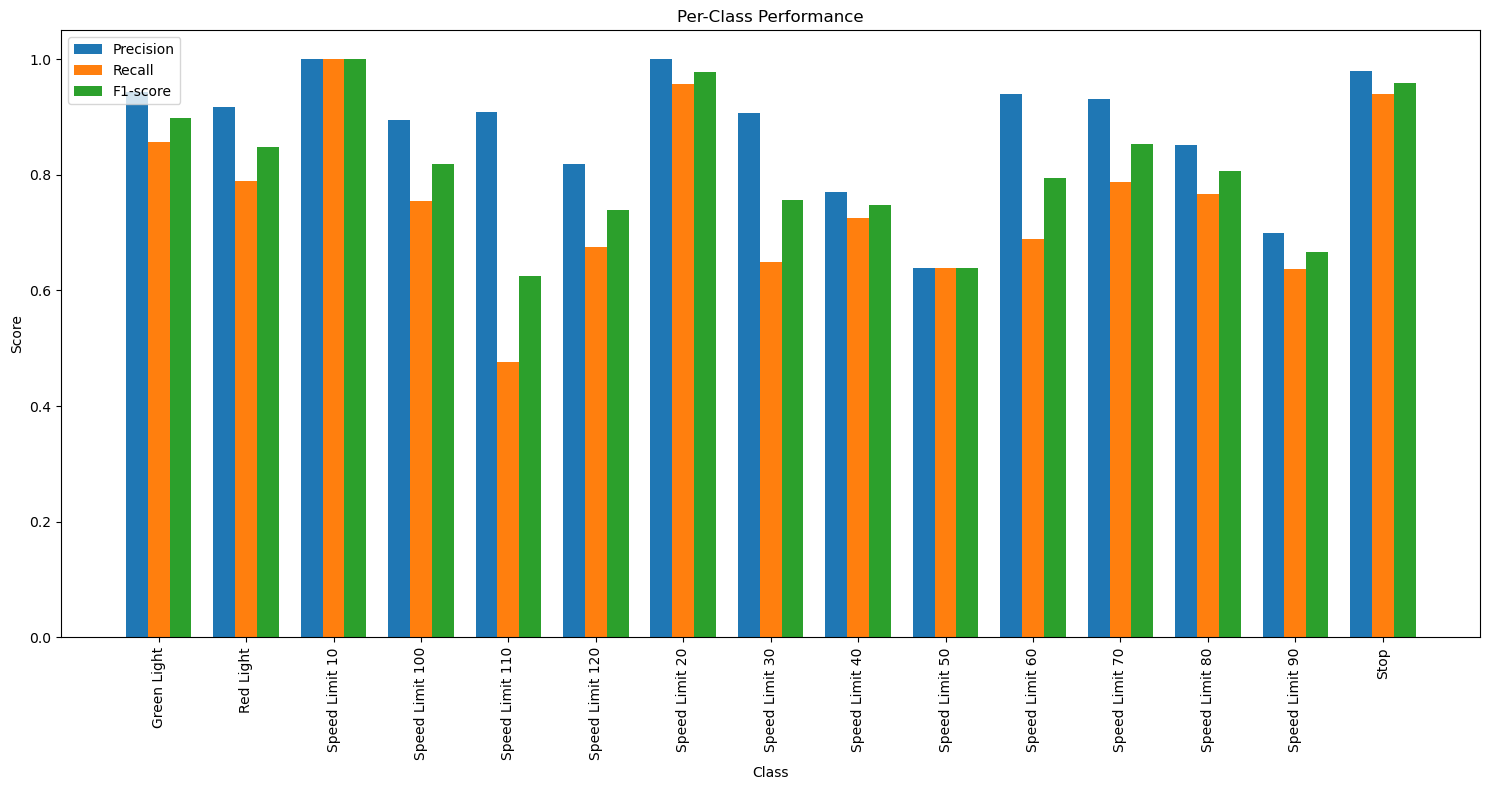


Performance on multi-label images:
Accuracy:       0.5094
Precision:      0.9432
Recall:         0.7155
F1 Score:       0.8137
Hamming Loss:   0.0478
Subset Accuracy:0.5094

Performance on single-label images:
Accuracy:       0.7277
Precision:      0.8649
Recall:         0.7671
F1 Score:       0.8131
Hamming Loss:   0.0235
Subset Accuracy:0.7277
Evaluation complete. Results saved to A_test_results.txt


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import alexnet, AlexNet_Weights
from torchvision import transforms
from PIL import Image
import os
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, hamming_loss

# Use Dataloader to load data
data_path = "traffic_sign_detection/car_resized"

subfolders = ["train", "test", "valid"]

# define transforms 
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.RandomHorizontalFlip(), 
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # brightness
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Affine
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    ]), 
    
    'eval': transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    ])
}

class ImageLabelDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.num_classes = 15

        # sort : keep the order
        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        image_path = os.path.join(self.image_dir, image_file)
        label_path = os.path.join(self.label_dir, image_file.replace('.jpg', '.txt'))

        image = Image.open(image_path).convert('RGB')
        label = torch.zeros(self.num_classes)

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    tokens = line.strip().split()
                    if not tokens:
                        continue
                    try:
                        class_id = int(tokens[0])
                        if 0 <= class_id < self.num_classes:
                            label[class_id] = 1
                    except ValueError:
                        continue

        if self.transform:
            image = self.transform(image)

        return image, label

datasets = []

for name in subfolders:
    image_dir = os.path.join(data_path, name, "images")
    label_dir = os.path.join(data_path, name, "labels")

    if name == "train":
        transform = data_transforms['train']
    else:
        transform = data_transforms['eval']

    datasets.append(ImageLabelDataset(image_dir, label_dir, transform=transform))

train_dataset, test_dataset, valid_dataset = datasets

batch = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=False)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

train_size = len(train_dataset)
valid_size = len(valid_dataset)
test_size = len(test_dataset)

# Model init
model = alexnet(weights=AlexNet_Weights.DEFAULT)
num_classes = 15
model.classifier[6] = nn.Linear(4096, num_classes)

# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True

print(model)

# model info
input_size = (3, 224, 224)
summary(model, input_size=input_size)

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model.to(device)

# different lr 
optimizer = optim.Adam([
    {"params": model.features[0:3].parameters(), "lr": 3e-6},   
    {"params": model.features[3:6].parameters(), "lr": 5e-6},   
    {"params": model.features[6:].parameters(), "lr": 1e-5},    
    {"params": model.classifier[0:3].parameters(), "lr": 5e-5},  
    {"params": model.classifier[3:6].parameters(), "lr": 1e-4},   
    {"params": model.classifier[6].parameters(), "lr": 5e-4}     
], weight_decay=1e-4)  # l2


criterion = nn.BCEWithLogitsLoss()

# lr scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',  # firstly based in F1
    factor=0.5,  # divided by 2
    patience=3,  # wait 3 times if there is no progress
    verbose=True
)

def plot_metrics(train_losses, valid_losses, train_metrics, valid_metrics):
    """绘制多个指标的训练曲线"""
    epochs = range(1, len(train_losses) + 1)
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    # 2*3
    plt.figure(figsize=(18, 10))
    
    # loss curves
    plt.subplot(2, 3, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, valid_losses, label="Valid Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    # for metrics
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i+2)  # 从2开始，最大到5
        plt.plot(epochs, [m[i] for m in train_metrics], label=f"Train {metric}")
        plt.plot(epochs, [m[i] for m in valid_metrics], label=f"Valid {metric}")
        plt.title(f"{metric} Curve")
        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig("A_training_metrics.png")
    plt.show()

def calculate_metrics(all_labels, all_preds, threshold=0.5):
    """计算多个评估指标"""
    # Binary
    binary_preds = (all_preds > threshold).astype(float)
    
    
    accuracy = accuracy_score(all_labels, binary_preds)
    precision = precision_score(all_labels, binary_preds, average='micro', zero_division=0)
    recall = recall_score(all_labels, binary_preds, average='micro', zero_division=0)
    f1 = f1_score(all_labels, binary_preds, average='micro')
    
    # for every class
    class_precision = precision_score(all_labels, binary_preds, average=None, zero_division=0)
    class_recall = recall_score(all_labels, binary_preds, average=None, zero_division=0)
    class_f1 = f1_score(all_labels, binary_preds, average=None, zero_division=0)
    
    # for multi-label 
    hamming = hamming_loss(all_labels, binary_preds)
    subset_acc = accuracy_score(all_labels, binary_preds, normalize=True)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'class_precision': class_precision,
        'class_recall': class_recall,
        'class_f1': class_f1,
        'hamming_loss': hamming,
        'subset_accuracy': subset_acc
    }


def print_metrics(metrics, epoch=None, phase=None):
    """打印评估指标"""
    if epoch is not None and phase is not None:
        print(f"\nEpoch {epoch} - {phase} Metrics:")
    
    print(f"Accuracy:       {metrics['accuracy']:.4f}")
    print(f"Precision:      {metrics['precision']:.4f}")
    print(f"Recall:         {metrics['recall']:.4f}")
    print(f"F1 Score:       {metrics['f1']:.4f}")
    print(f"Hamming Loss:   {metrics['hamming_loss']:.4f}")
    print(f"Subset Accuracy:{metrics['subset_accuracy']:.4f}")

def train(model, criterion, optimizer, scheduler, train_dataloader, valid_dataloader, 
          num_epochs=30, threshold=0.5):
    """训练模型"""
    device = next(model.parameters()).device
    best_f1 = 0.0
    
    train_losses, valid_losses = [], []
    train_metrics_history, valid_metrics_history = [], []
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print('-' * 50)
        
        # training
        model.train()
        running_loss = 0.0
        all_train_labels = []
        all_train_preds = []
        
        for inputs, labels in train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            # forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # backward
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            
            
            all_train_labels.append(labels.cpu().numpy())
            all_train_preds.append(torch.sigmoid(outputs).detach().cpu().numpy())
        
        epoch_loss = running_loss / len(train_dataset)
        train_losses.append(epoch_loss)
        
        all_train_labels = np.vstack(all_train_labels)
        all_train_preds = np.vstack(all_train_preds)
        
        train_metrics = calculate_metrics(all_train_labels, all_train_preds, threshold)
        train_metrics_list = [train_metrics['accuracy'], train_metrics['precision'], 
                             train_metrics['recall'], train_metrics['f1']]
        train_metrics_history.append(train_metrics_list)
        
        print(f"Train Loss: {epoch_loss:.4f}")
        print_metrics(train_metrics)
        
        # valid
        model.eval()
        running_loss = 0.0
        all_valid_labels = []
        all_valid_preds = []
        
        with torch.no_grad():
            for inputs, labels in valid_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
                
                
                all_valid_labels.append(labels.cpu().numpy())
                all_valid_preds.append(torch.sigmoid(outputs).cpu().numpy())
        
        epoch_loss = running_loss / len(valid_dataset)
        valid_losses.append(epoch_loss)
        
        all_valid_labels = np.vstack(all_valid_labels)
        all_valid_preds = np.vstack(all_valid_preds)
        
        valid_metrics = calculate_metrics(all_valid_labels, all_valid_preds, threshold)
        valid_metrics_list = [valid_metrics['accuracy'], valid_metrics['precision'], 
                             valid_metrics['recall'], valid_metrics['f1']]
        valid_metrics_history.append(valid_metrics_list)
        
        print(f"Valid Loss: {epoch_loss:.4f}")
        print_metrics(valid_metrics)
        
        scheduler.step(valid_metrics['f1'])
        
        # save the best model
        if valid_metrics['f1'] > best_f1:
            best_f1 = valid_metrics['f1']
            torch.save(model.state_dict(), 'A_best_model.pt')
            print(f"Best model saved with F1: {best_f1:.4f}")
        
        # printing
        if (epoch + 1) % 5 == 0:  # every 5 epochs
            class_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 
                          'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 
                          'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
                          'Speed Limit 80', 'Speed Limit 90', 'Stop']
            
            print("\nClass-wise Performance:")
            for i, name in enumerate(class_names):
                print(f"{name}: Precision={valid_metrics['class_precision'][i]:.4f}, "
                      f"Recall={valid_metrics['class_recall'][i]:.4f}, "
                      f"F1={valid_metrics['class_f1'][i]:.4f}")
    
    # call polting function
    plot_metrics(train_losses, valid_losses, train_metrics_history, valid_metrics_history)
    
    return model

def evaluate_model(model, dataloader, threshold=0.5):
    """在测试集上评估模型"""
    device = next(model.parameters()).device
    model.eval()
    
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs)
            
            all_labels.append(labels.numpy())
            all_preds.append(probs.cpu().numpy())
    
    all_labels = np.vstack(all_labels)
    all_preds = np.vstack(all_preds)
    
    # maybe try different threshold?
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print("\nPerformance across different thresholds:")
    
    best_threshold = 0.5
    best_f1 = 0
    
    for t in thresholds:
        metrics = calculate_metrics(all_labels, all_preds, t)
        print(f"\nThreshold = {t}:")
        print_metrics(metrics)
        
        if metrics['f1'] > best_f1:
            best_f1 = metrics['f1']
            best_threshold = t
    
    print(f"\nBest threshold: {best_threshold} with F1 Score: {best_f1:.4f}")
    
    # use the best treshold
    metrics = calculate_metrics(all_labels, all_preds, best_threshold)
    
    # diffenrent class performence figures
    class_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 
                  'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 
                  'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
                  'Speed Limit 80', 'Speed Limit 90', 'Stop']
    
    plt.figure(figsize=(15, 8))
    x = np.arange(len(class_names))
    width = 0.25
    
    plt.bar(x - width, metrics['class_precision'], width, label='Precision')
    plt.bar(x, metrics['class_recall'], width, label='Recall')
    plt.bar(x + width, metrics['class_f1'], width, label='F1-score')
    
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title('Per-Class Performance')
    plt.xticks(x, class_names, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig('A_class_performance.png')
    plt.show()
    
    # show the multi-label performance
    multi_label_indices = np.where(np.sum(all_labels, axis=1) > 1)[0]
    single_label_indices = np.where(np.sum(all_labels, axis=1) == 1)[0]
    
    if len(multi_label_indices) > 0:
        multi_metrics = calculate_metrics(
            all_labels[multi_label_indices], 
            all_preds[multi_label_indices], 
            best_threshold
        )
        print("\nPerformance on multi-label images:")
        print_metrics(multi_metrics)
    
    if len(single_label_indices) > 0:
        single_metrics = calculate_metrics(
            all_labels[single_label_indices], 
            all_preds[single_label_indices], 
            best_threshold
        )
        print("\nPerformance on single-label images:")
        print_metrics(single_metrics)
    
    return metrics

# train it
trained_model = train(
    model,
    criterion,
    optimizer,
    scheduler,
    train_dataloader,
    valid_dataloader,
    num_epochs=20,
    threshold=0.5
)

# test
model.load_state_dict(torch.load('A_best_model.pt'))
test_metrics = evaluate_model(model, test_dataloader)

# save the result
with open('A_test_results.txt', 'w') as f:
    f.write("AlexNet Test Results (Full Unfreeze)\n")
    f.write("---------------------------------\n")
    f.write(f"Accuracy:        {test_metrics['accuracy']:.4f}\n")
    f.write(f"Precision:       {test_metrics['precision']:.4f}\n")
    f.write(f"Recall:          {test_metrics['recall']:.4f}\n")
    f.write(f"F1 Score:        {test_metrics['f1']:.4f}\n")
    f.write(f"Hamming Loss:    {test_metrics['hamming_loss']:.4f}\n")
    f.write(f"Subset Accuracy: {test_metrics['subset_accuracy']:.4f}\n")
    
    # for each class
    f.write("\nPer-Class Results:\n")
    class_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 
                  'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 
                  'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
                  'Speed Limit 80', 'Speed Limit 90', 'Stop']
    
    for i, name in enumerate(class_names):
        f.write(f"{name}: Precision={test_metrics['class_precision'][i]:.4f}, ")
        f.write(f"Recall={test_metrics['class_recall'][i]:.4f}, ")
        f.write(f"F1={test_metrics['class_f1'][i]:.4f}\n")

print("Evaluation complete. Results saved to A_test_results.txt")

Loading models...


/var/folders/wz/0c7bfp356ll9s67twzcqkv340000gn/T/ipykernel_56791/7593708.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, ma


Testing models on all multi-label images...
Found 97 multi-label images
Testing all multi-label images in order...

Image 1/97: 000287_jpg.rf.a4143ed52df9779f0f27104daf6a8762.jpg

Testing with ResNet34:


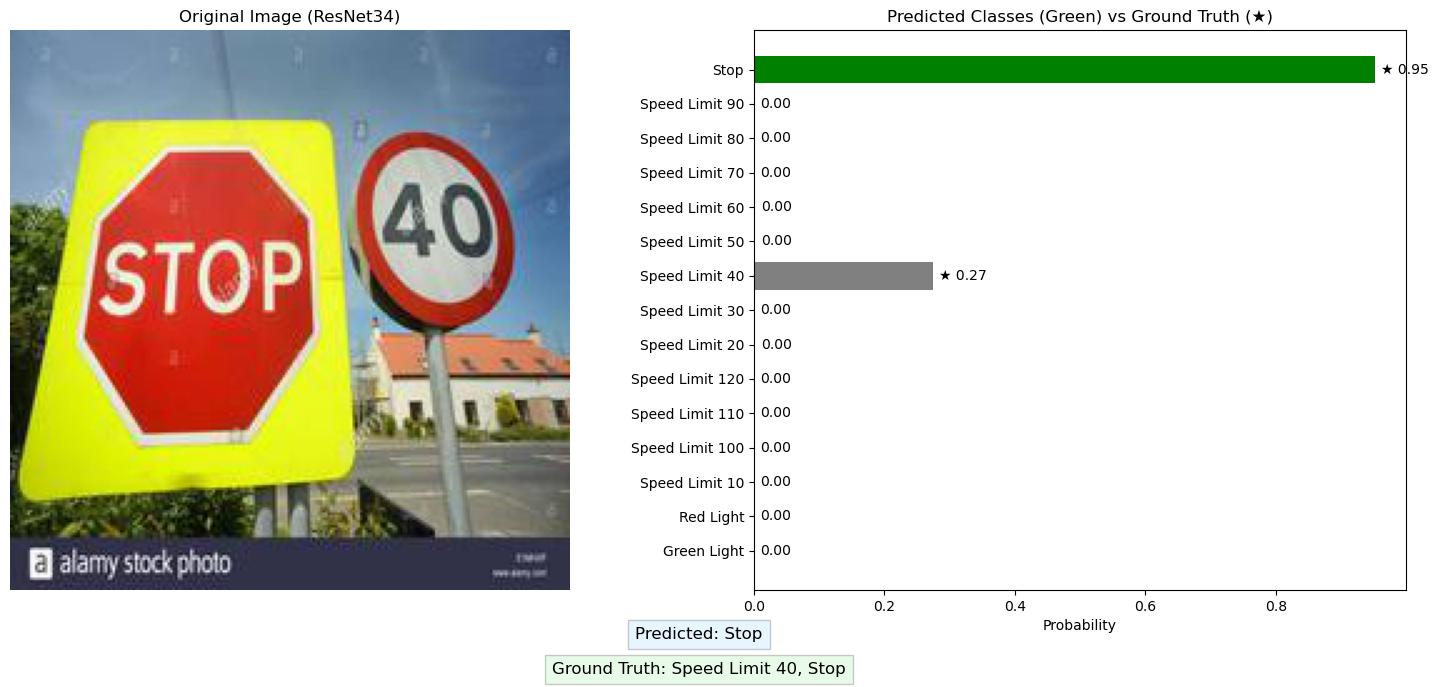


Testing with AlexNet:


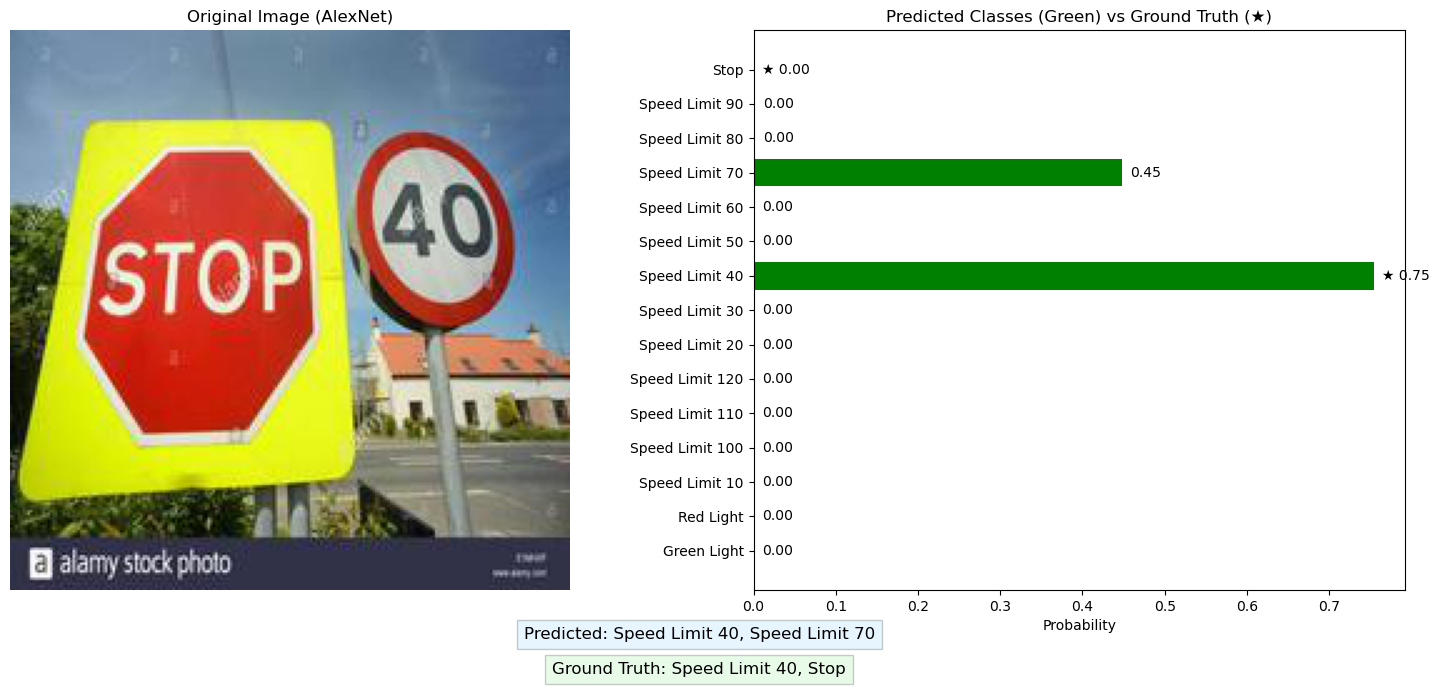


Image 2/97: 000512_jpg.rf.e2e180ced9b44c98c59556fef04838bd.jpg

Testing with ResNet34:


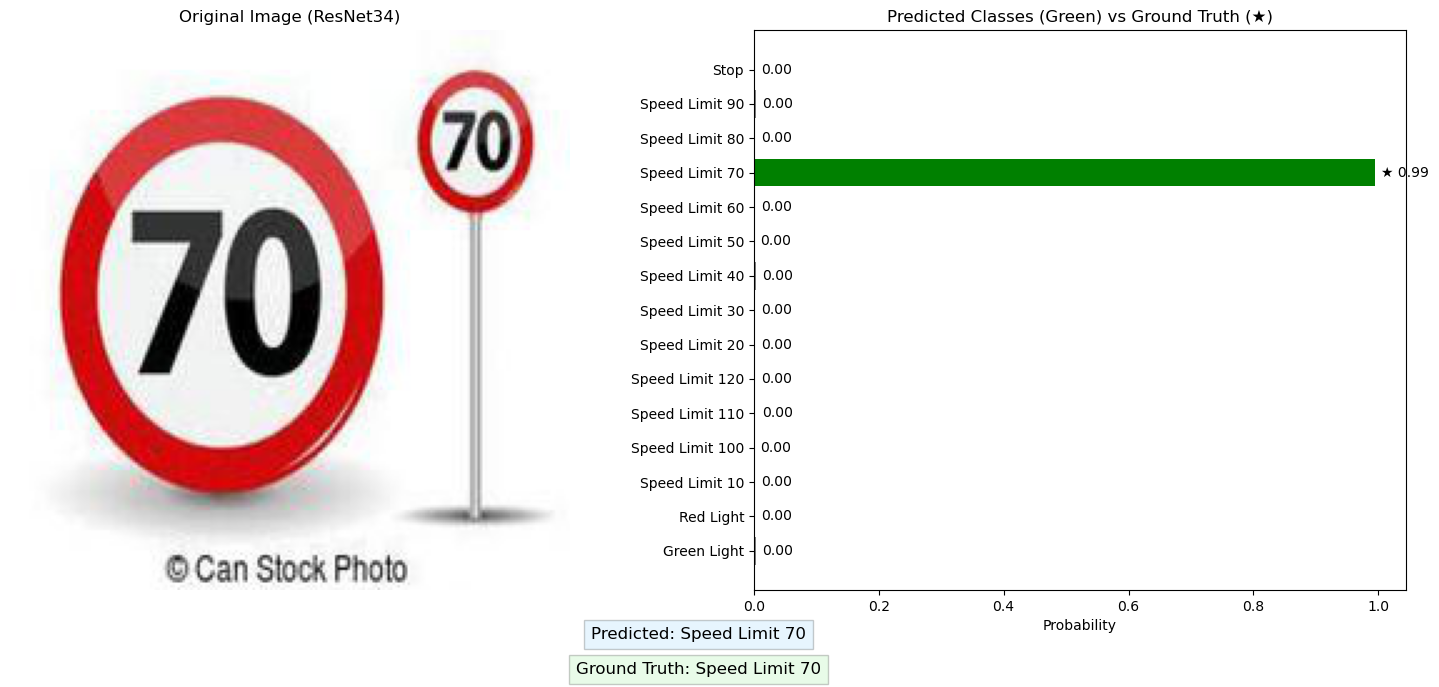


Testing with AlexNet:


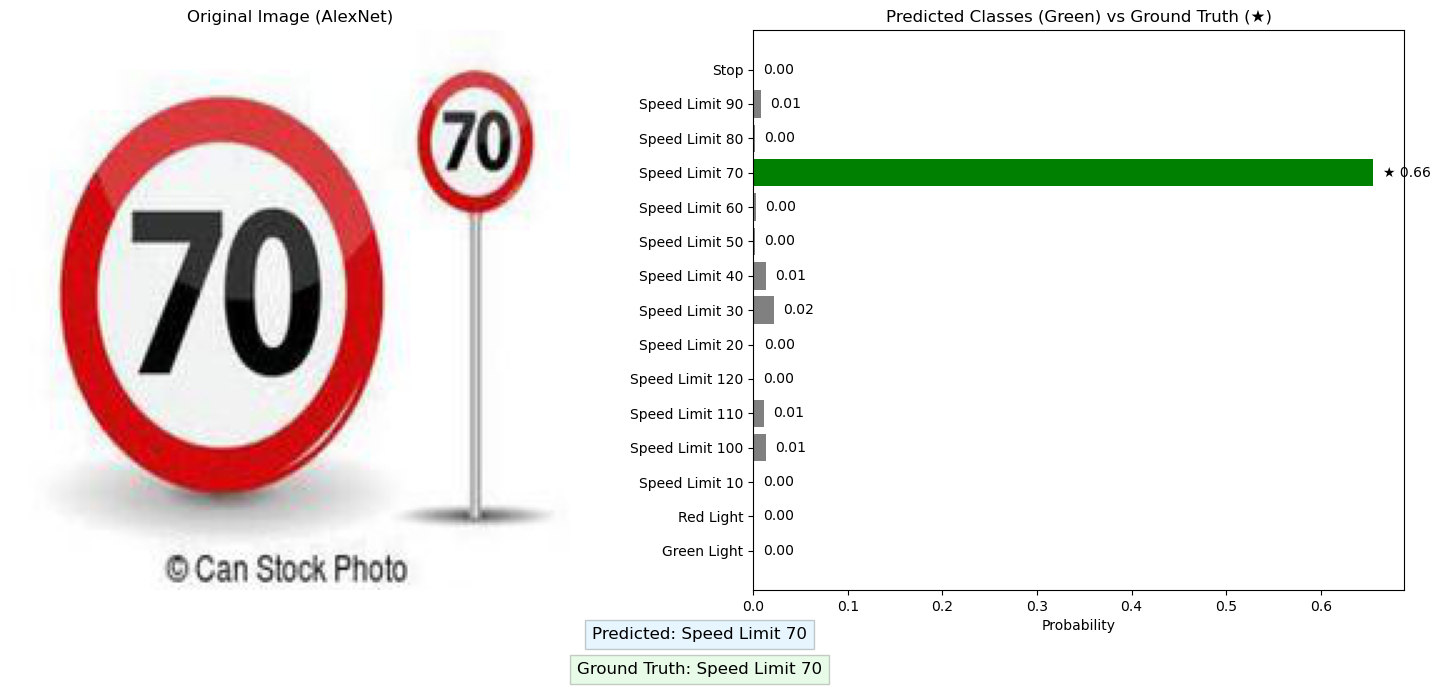


Image 3/97: 000664_jpg.rf.882fdd90b90c7f1af1fc37a7467443cf.jpg

Testing with ResNet34:


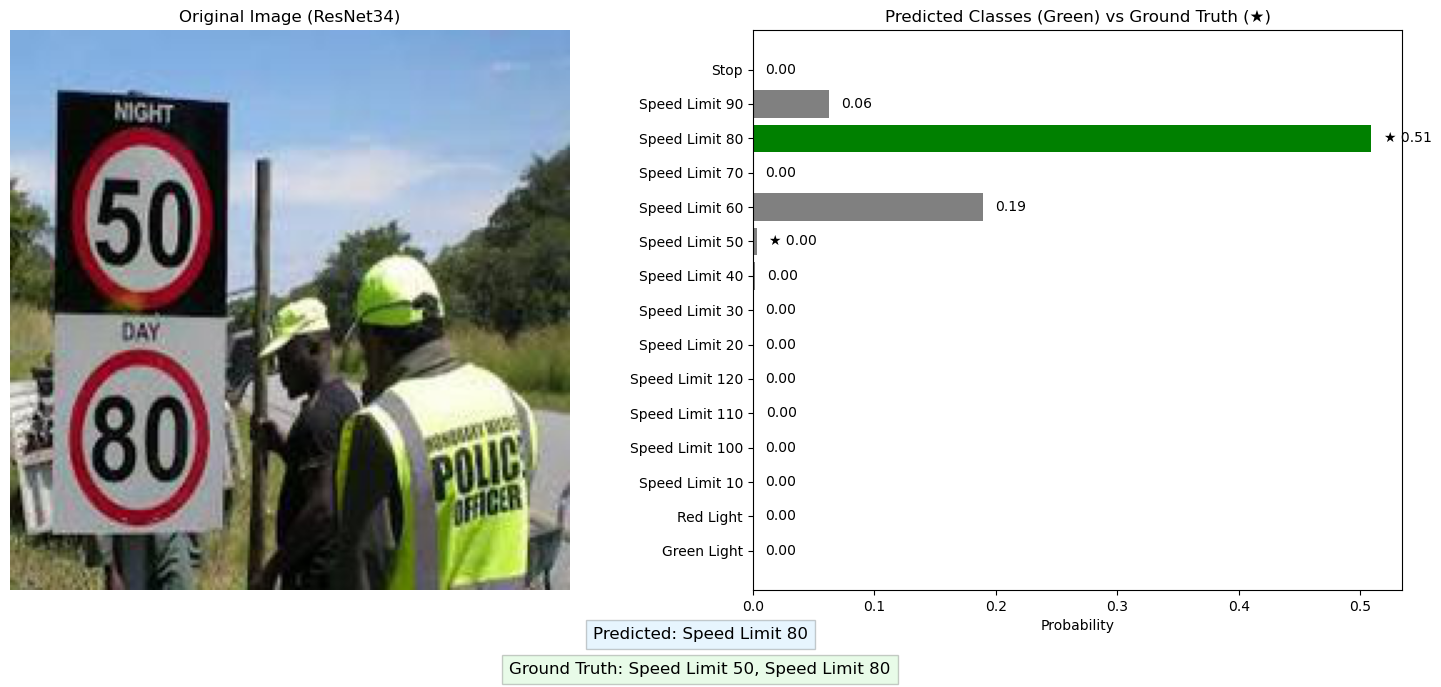


Testing with AlexNet:


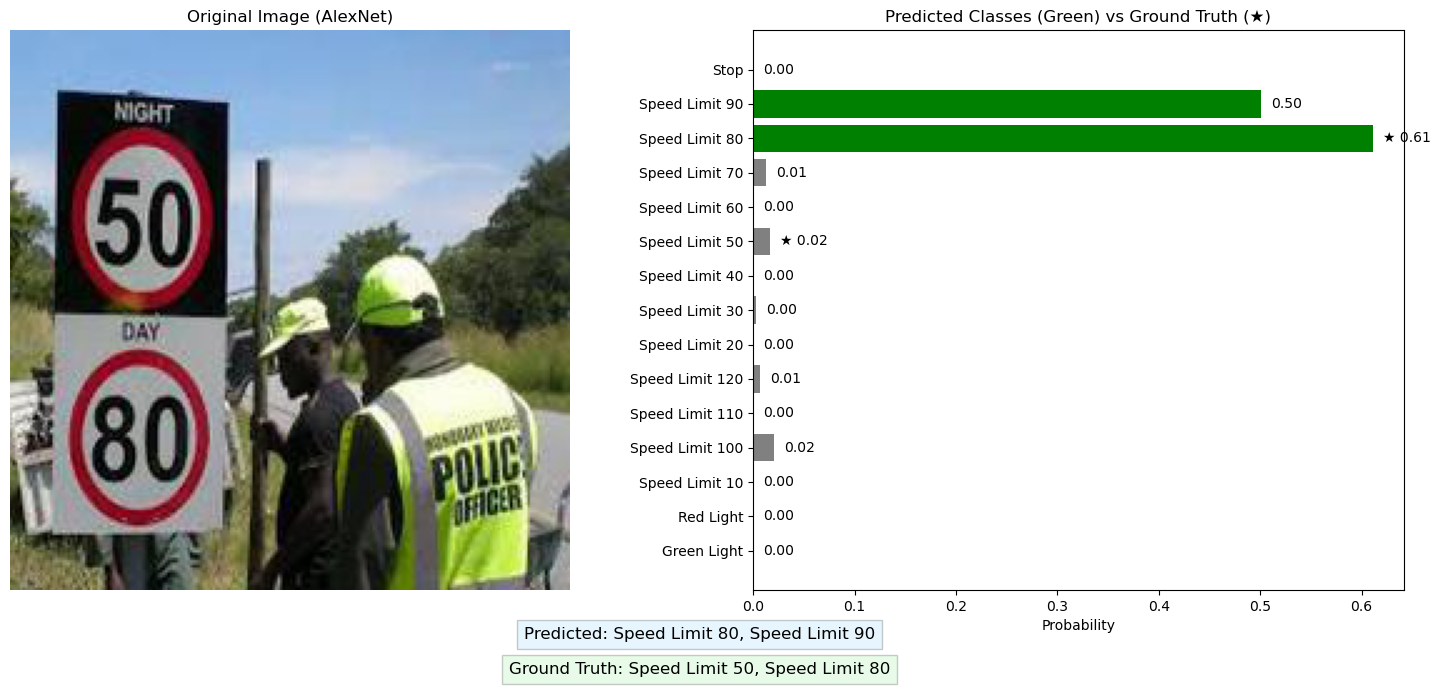


Image 4/97: 000684_jpg.rf.da8d58e5754b48f640c2521ce190912e.jpg

Testing with ResNet34:


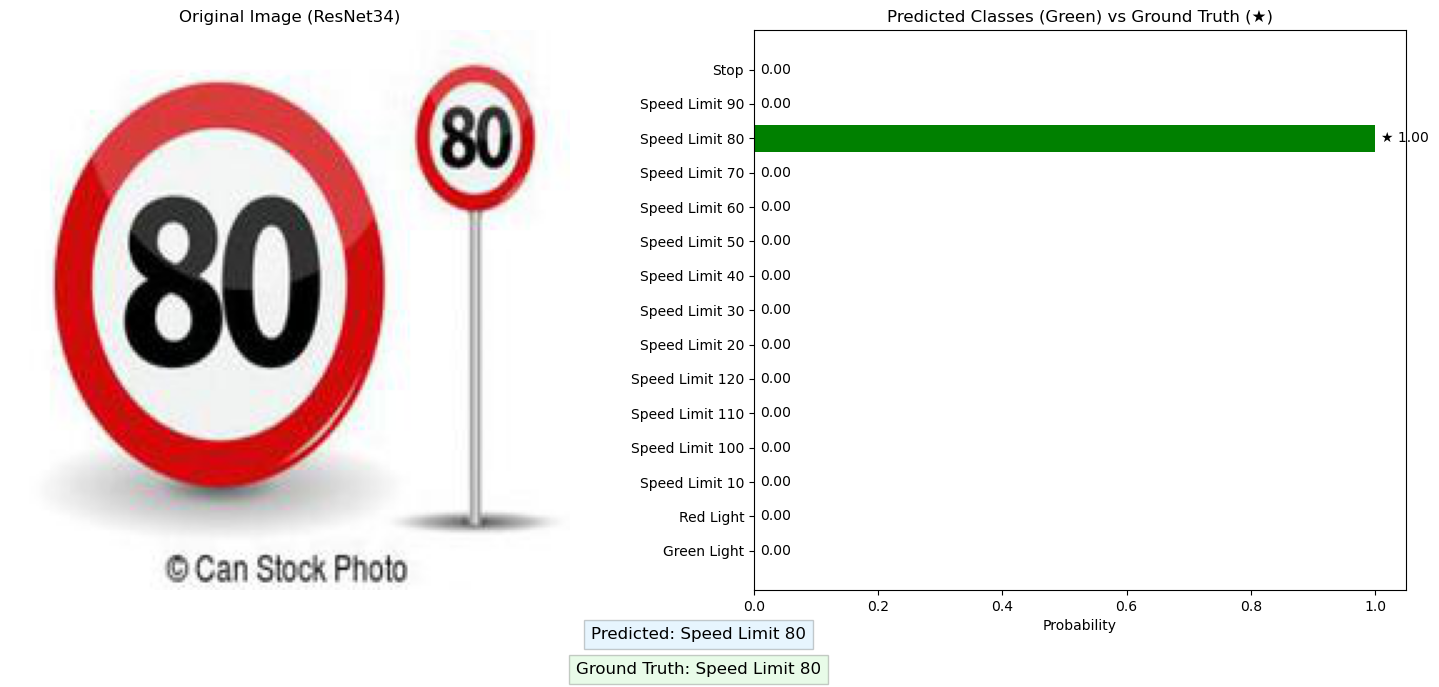


Testing with AlexNet:


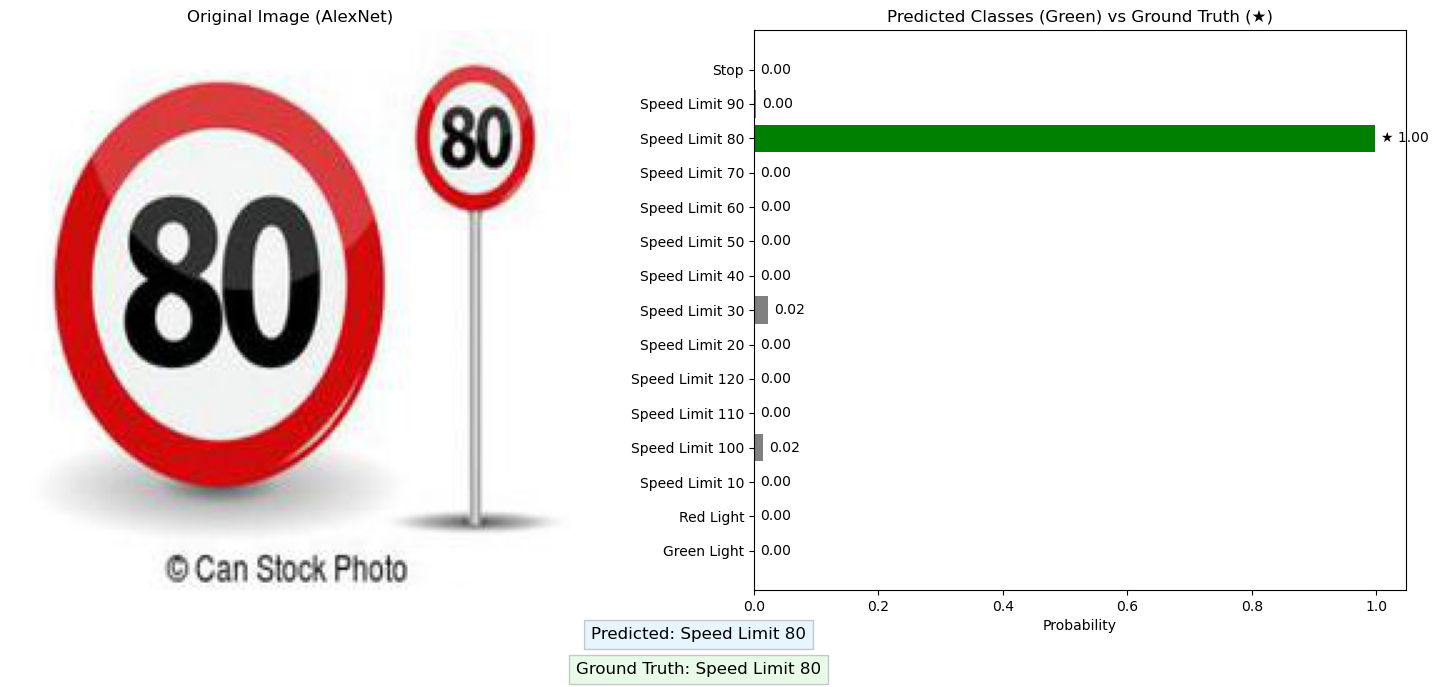

Testing complete!


In [2]:
import torch
import torch.nn as nn
from torchvision.models import resnet34, ResNet34_Weights, alexnet, AlexNet_Weights
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Define preprocessing transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load pretrained model
def load_model(model_path, model_type):
    if model_type == "resnet34":
        model = resnet34(weights=ResNet34_Weights.DEFAULT)
        num_classes = 15
        in_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features, num_classes)
        )
    elif model_type == "alexnet":
        model = alexnet(weights=AlexNet_Weights.DEFAULT)
        num_classes = 15
        model.classifier[6] = nn.Linear(4096, num_classes)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    # Load trained weights
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

# Read ground truth label for comparison
def read_label_file(label_path, num_classes=15):
    ground_truth = np.zeros(num_classes)
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                tokens = line.strip().split()
                if not tokens:
                    continue
                try:
                    class_id = int(tokens[0])
                    if 0 <= class_id < num_classes:
                        ground_truth[class_id] = 1
                except ValueError:
                    continue
    
    return ground_truth

# Prediction function with ground truth comparison
def predict_image_with_ground_truth(model, image_path, label_path, transform, threshold=0.5, num_classes=15):
    # Load and predict image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.sigmoid(outputs)
        preds = (probs > threshold).float().squeeze().numpy()
    
    # Read ground truth label
    ground_truth = read_label_file(label_path, num_classes)
    
    return image, preds, probs.squeeze().numpy(), ground_truth

# Visualize prediction results with ground truth comparison
def visualize_prediction_with_ground_truth(image, preds, probs, ground_truth, class_names, threshold=0.5, model_name=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    # Display original image
    ax1.imshow(image)
    ax1.set_title(f"Original Image ({model_name})")
    ax1.axis('off')
    
    # Display prediction probability bar chart
    y_pos = np.arange(len(class_names))
    
    # Simple color scheme: predicted classes are green, others are grey
    colors = ['green' if p > threshold else 'grey' for p in probs]
    
    # Plot bars
    ax2.barh(y_pos, probs, color=colors)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(class_names)
    ax2.set_xlabel('Probability')
    ax2.set_title('Predicted Classes (Green) vs Ground Truth (★)')
    
    # Add probability value labels and mark ground truth with stars
    for i, prob in enumerate(probs):
        # Mark ground truth with a star
        if ground_truth[i] == 1:
            label = f"★ {prob:.2f}"
        else:
            label = f"{prob:.2f}"
        
        ax2.text(prob + 0.01, i, label, va='center')
    
    # Add prediction result text and ground truth text
    detected_classes = [class_names[i] for i in range(len(class_names)) if preds[i] == 1]
    ground_truth_classes = [class_names[i] for i in range(len(class_names)) if ground_truth[i] == 1]
    
    if detected_classes:
        detected_text = "Predicted: " + ", ".join(detected_classes)
    else:
        detected_text = "No Traffic Signs Predicted"
        
    if ground_truth_classes:
        gt_text = "Ground Truth: " + ", ".join(ground_truth_classes)
    else:
        gt_text = "No Traffic Signs in Ground Truth"
    
    plt.figtext(0.5, 0.08, detected_text, ha="center", fontsize=12, 
                bbox={"facecolor":"lightskyblue", "alpha":0.2, "pad":5})
    plt.figtext(0.5, 0.03, gt_text, ha="center", fontsize=12, 
                bbox={"facecolor":"lightgreen", "alpha":0.2, "pad":5})
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Leave space for bottom text
    plt.show()

# Find all multi-label images in the dataset
def find_all_multi_label_images(image_dir, label_dir):
    multi_label_images = []
    
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
    
    for img_file in image_files:
        label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                # If there are multiple label lines, it's a multi-label image
                if len(lines) > 1:
                    multi_label_images.append((
                        os.path.join(image_dir, img_file),
                        label_path
                    ))
    
    return multi_label_images

# Test all multi-label images with both models
def test_all_multi_label_images(resnet_model, alexnet_model, test_image_dir, test_label_dir, class_names, threshold=0.5):
    # Get all multi-label images
    multi_label_images = find_all_multi_label_images(test_image_dir, test_label_dir)
    
    if not multi_label_images:
        print("No multi-label images found!")
        return
    
    print(f"Found {len(multi_label_images)} multi-label images")
    print("Testing all multi-label images in order...")
    
    # Process each image
    for i, (image_path, label_path) in enumerate(multi_label_images):
        print(f"\nImage {i+1}/{len(multi_label_images)}: {os.path.basename(image_path)}")
        
        # Test with ResNet34
        print("\nTesting with ResNet34:")
        image, preds_resnet, probs_resnet, ground_truth = predict_image_with_ground_truth(
            resnet_model, image_path, label_path, transform, threshold)
        
        # Visualize ResNet34 results
        visualize_prediction_with_ground_truth(
            image, preds_resnet, probs_resnet, ground_truth, class_names, threshold, "ResNet34")
        
        # Test with AlexNet
        print("\nTesting with AlexNet:")
        image, preds_alexnet, probs_alexnet, ground_truth = predict_image_with_ground_truth(
            alexnet_model, image_path, label_path, transform, threshold)
        
        # Visualize AlexNet results
        visualize_prediction_with_ground_truth(
            image, preds_alexnet, probs_alexnet, ground_truth, class_names, threshold, "AlexNet")
        
        # Ask user if they want to continue to the next image
        if i < len(multi_label_images) - 1:
            response = input("\nPress Enter to continue to the next image or 'q' to quit: ")
            if response.lower() == 'q':
                break

# Main function
def main():
    # Model paths
    resnet_model_path = 'R_best_model.pt'  # Replace with your model save path
    alexnet_model_path = 'A_best_model.pt'  # Replace with your model save path
    
    # Data path
    data_path = "traffic_sign_detection/car_resized"
    test_image_dir = os.path.join(data_path, "test", "images")
    test_label_dir = os.path.join(data_path, "test", "labels")
    
    # Class names
    class_names = [
        'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 
        'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 
        'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
        'Speed Limit 80', 'Speed Limit 90', 'Stop'
    ]
    
    # Classification threshold
    threshold = 0.4
    
    # Load models
    print("Loading models...")
    resnet_model = load_model(resnet_model_path, model_type="resnet34")
    alexnet_model = load_model(alexnet_model_path, model_type="alexnet")
    
    print("\nTesting models on all multi-label images...")
    test_all_multi_label_images(resnet_model, alexnet_model, test_image_dir, test_label_dir, class_names, threshold)
    
    print("Testing complete!")

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import alexnet, AlexNet_Weights
from torchvision import transforms
import cv2
import numpy as np
import datetime

# -------------------------------
# Configuration
# -------------------------------
model_path = "A_best_model.pt"              # Path to your trained model
video_path = "traffic_sign_detection/video.mp4"  # Path to your test video
output_video_path = "output_video.mp4"
class_names = [
    'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100',
    'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30',
    'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
    'Speed Limit 80', 'Speed Limit 90', 'Stop'
]

threshold = 0.5  # Prediction threshold

# -------------------------------
# Load Model
# -------------------------------
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

model = alexnet(weights=AlexNet_Weights.DEFAULT)
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.classifier[6].in_features, len(class_names))
)

# Load the pre-trained weights
state_dict = torch.load(model_path, map_location=device)

# 修正权重映射
new_state_dict = {}
for key, value in state_dict.items():
    new_key = key.replace("classifier.6.", "classifier.6.1.")
    new_state_dict[new_key] = value

# 加载到模型
model.load_state_dict(new_state_dict, strict=False)

model = model.to(device)
model.eval()

# -------------------------------
# Define Transform
# -------------------------------
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# -------------------------------
# Video Capture and Output
# -------------------------------
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# 录制相关
is_recording = False
recording_out = None
recording_filename = ""

if not cap.isOpened():
    print("Cannot open video.")
    exit()

print("Processing video...")

# -------------------------------
# Process Video Frames
# -------------------------------
while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    # Preprocess the frame
    input_img = transform(frame).unsqueeze(0).to(device)

    # Model Inference
    with torch.no_grad():
        outputs = model(input_img)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

    # Get predictions above the threshold
    predictions = [class_names[i] for i, prob in enumerate(probs) if prob > threshold]

    # Display predictions
    label_str = " | ".join(predictions) if predictions else "No Sign Detected"
    cv2.putText(frame, label_str, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Save frame to output video
    out.write(frame)

    # 如果在录制模式，保存到录制文件
    if is_recording and recording_out is not None:
        recording_out.write(frame)

    # Display frame
    cv2.imshow("Traffic Sign Detection", frame)

    # Key controls
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('r') and not is_recording:
        # 开始录制
        recording_filename = f"record_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.mp4"
        print(f"Recording started: {recording_filename}")
        recording_out = cv2.VideoWriter(recording_filename, fourcc, fps, (width, height))
        is_recording = True
    elif key == ord('s') and is_recording:
        # 停止录制
        print(f"Recording stopped: {recording_filename}")
        is_recording = False
        recording_out.release()
        recording_out = None

# -------------------------------
# Release Video Capture and Output
# -------------------------------
cap.release()
out.release()
if recording_out is not None:
    recording_out.release()
cv2.destroyAllWindows()
print(f"Video processing complete. Output saved to {output_video_path}")

Using device: mps


/var/folders/wz/0c7bfp356ll9s67twzcqkv340000gn/T/ipykernel_56748/1193290409.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_loca

Processing video...
End of video.
Video processing complete. Output saved to output_video.mp4


2025-05-09 15:46:18.190 python[56748:5970236] error messaging the mach port for IMKCFRunLoopWakeUpReliable


In [1]:
import torch
import torch.nn as nn
from torchvision.models import resnet34, ResNet34_Weights
from torchvision import transforms
import cv2
import numpy as np
import datetime

# -------------------------------
# Configuration
# -------------------------------
model_path = "R_best_model.pt"              # Path to your trained model
video_path = "traffic_sign_detection/video.mp4"  # Path to your test video
output_video_path = "output_video.mp4"
class_names = [
    'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100',
    'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30',
    'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
    'Speed Limit 80', 'Speed Limit 90', 'Stop'
]

threshold = 0.5  # Prediction threshold

# -------------------------------
# Load Model
# -------------------------------
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet34(weights=ResNet34_Weights.DEFAULT)
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, len(class_names))
)

# Load the pre-trained weights
state_dict = torch.load(model_path, map_location=device)

# 加载到模型
model.load_state_dict(state_dict, strict=False)
model = model.to(device)
model.eval()

# -------------------------------
# Define Transform
# -------------------------------
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# -------------------------------
# Video Capture and Output
# -------------------------------
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# 录制相关
is_recording = False
recording_out = None
recording_filename = ""

if not cap.isOpened():
    print("Cannot open video.")
    exit()

print("Processing video...")

# -------------------------------
# Process Video Frames
# -------------------------------
while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video.")
        break

    # Preprocess the frame
    input_img = transform(frame).unsqueeze(0).to(device)

    # Model Inference
    with torch.no_grad():
        outputs = model(input_img)
        probs = torch.sigmoid(outputs).cpu().numpy().flatten()

    # Get predictions above the threshold
    predictions = [class_names[i] for i, prob in enumerate(probs) if prob > threshold]

    # Display predictions
    label_str = " | ".join(predictions) if predictions else "No Sign Detected"
    cv2.putText(frame, label_str, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # 显示录制状态
    if is_recording:
        cv2.putText(frame, "Recording...", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Save frame to output video
    out.write(frame)

    # 如果在录制模式，保存到录制文件
    if is_recording and recording_out is not None:
        recording_out.write(frame)

    # Display frame
    cv2.imshow("Traffic Sign Detection", frame)

    # Key controls
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('r') and not is_recording:
        # 开始录制
        recording_filename = f"record_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.mp4"
        print(f"Recording started: {recording_filename}")
        recording_out = cv2.VideoWriter(recording_filename, fourcc, fps, (width, height))
        is_recording = True
    elif key == ord('s') and is_recording:
        # 停止录制
        print(f"Recording stopped: {recording_filename}")
        is_recording = False
        recording_out.release()
        recording_out = None

# -------------------------------
# Release Video Capture and Output
# -------------------------------
cap.release()
out.release()
if recording_out is not None:
    recording_out.release()
cv2.destroyAllWindows()
print(f"Video processing complete. Output saved to {output_video_path}")

Using device: mps


/var/folders/wz/0c7bfp356ll9s67twzcqkv340000gn/T/ipykernel_56791/2196565020.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_loca

Processing video...
Recording started: record_20250509_154811.mp4
End of video.
Video processing complete. Output saved to output_video.mp4


2025-05-09 15:48:19.937 python[56791:5972478] error messaging the mach port for IMKCFRunLoopWakeUpReliable
